In [1]:
import torch
import matplotlib.pyplot as plt

In [3]:
#load a .pt file 
dataset = "./datasets/density_karman_Re_200.pt"
data = torch.load(dataset, weights_only=True)

In [4]:
data.shape

torch.Size([1001, 1, 512, 256])

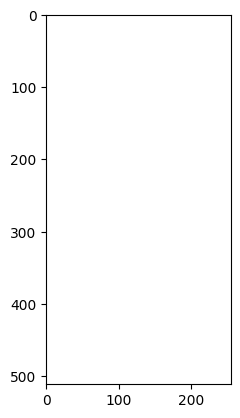

MovieWriter imagemagick unavailable; using Pillow instead.


In [4]:
#the first dimension is the number of samples
#plot a gif of the samples
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np

fig = plt.figure()
ims = []
for i in range(data.shape[0]):
    im = plt.imshow(data[i,0,:,:].numpy(), animated=True)
    ims.append([im])
ani = animation.ArtistAnimation(fig, ims, interval=50, blit=True, repeat_delay=1000)
#plt.show()
#plt.close()

ani.save('full_density_karman_Re_200.gif', writer='imagemagick', fps=10)

In [5]:
# save only the samples after step 350 from the dataset into a .pt file
data = data[350:]
torch.save(data, "./Datasets/VortexStreet_Re_200_default/density_karman_Re_200_after_step_350.pt")

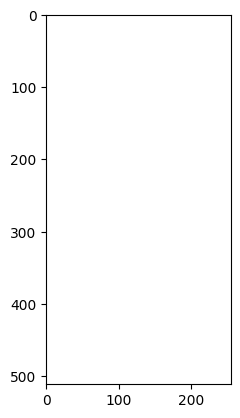

In [6]:
#visualize the samples after step 350
fig = plt.figure()
ims = []
for i in range(data.shape[0]):
    im = plt.imshow(data[i,0,:,:].numpy(), animated=True)
    ims.append([im])
ani = animation.ArtistAnimation(fig, ims, interval=50, blit=True, repeat_delay=1000)
#plt.show()
#plt.close()


In [7]:
ani.save('cut_density_karman_Re_200.gif', writer='imagemagick', fps=10)

MovieWriter imagemagick unavailable; using Pillow instead.


In [5]:
#load the velocity field
vel_dataset = "./datasets/velocity_karman_Re_200.pt"
vel_data = torch.load(vel_dataset, weights_only=True)


In [6]:
vel_data.shape

torch.Size([1001, 2, 512, 256])

In [9]:
vel_mag = torch.linalg.norm(vel_data, ord=2, dim=1)
vel_mag.shape

torch.Size([1001, 512, 256])

MovieWriter imagemagick unavailable; using Pillow instead.


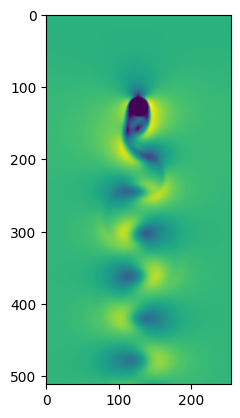

In [11]:
#save this dataset as a .gif file
fig = plt.figure()
ims = []
vel_mag = torch.linalg.norm(vel_data, ord=2, dim=1)
for i in range(vel_data.shape[0]):
    #save the velocity magnitude
    im = plt.imshow(vel_mag[i,:,:].numpy(), animated=True)
    ims.append([im])
ani = animation.ArtistAnimation(fig, ims, interval=50, blit=True, repeat_delay=1000)
#plt.show()
#plt.close()
ani.save('full_velocity_karman_Re_200.gif', writer='imagemagick', fps=10)

In [12]:
# save only the samples after step 350 from the dataset into a .pt file
vel_data = vel_data[350:]
torch.save(vel_data, "./Datasets/VortexStreet_Re_200_default/velocity_karman_Re_200_after_step_350.pt")

MovieWriter imagemagick unavailable; using Pillow instead.


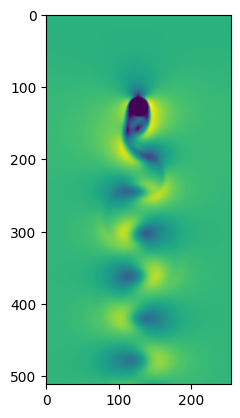

In [13]:
#visualize the samples after step 350
fig = plt.figure()
ims = []
vel_mag = torch.linalg.norm(vel_data, ord=2, dim=1)
for i in range(vel_data.shape[0]):
    #save the velocity magnitude
    im = plt.imshow(vel_mag[i,:,:].numpy(), animated=True)
    ims.append([im])
ani = animation.ArtistAnimation(fig, ims, interval=50, blit=True, repeat_delay=1000)
#plt.show()
#plt.close()
ani.save('cut_velocity_karman_Re_200.gif', writer='imagemagick', fps=10)

In [18]:
#merge density and velocity fields

#load dataset
density_data = torch.load('./Datasets/VortexStreet_Re_200_default/density_karman_Re_200_after_step_350.pt', weights_only=True) 
velocity_data = torch.load('./Datasets/VortexStreet_Re_200_default/velocity_karman_Re_200_after_step_350.pt', weights_only=True) 

density_data.shape

torch.Size([651, 1, 512, 256])

In [19]:
#merge datasets
mixed_data = torch.cat((density_data, velocity_data), dim=1)
print("Shape of the mixed data: ", mixed_data.shape)

Shape of the mixed data:  torch.Size([651, 3, 512, 256])


In [20]:
torch.save(mixed_data, './Datasets/VortexStreet_Re_200_default/mixed_karman_Re_200_after_step_350.pt')

In [3]:
velocity_dataset = "./Datasets/VortexStreet_Re_200_period_1/velocity_karman_vortex_re_200_period_1.pt"

In [7]:
velocity_array = torch.load(velocity_dataset, weights_only=True)

In [8]:
velocity_array.shape

torch.Size([1384, 2, 512, 256])

In [9]:
import os
os.getcwd()

'/local/disk/hramachandran/work/mlbm'

In [10]:
# Step 2: Set the directory to save plots
save_dir = "./Datasets/VortexStreet_Re_200_period_1/velocity_plots"
os.makedirs(save_dir, exist_ok=True)  # Create the directory if it doesn't exist

In [11]:
import matplotlib.pyplot as plt
import torch
import os

# Assuming velocity_array is your PyTorch tensor with shape [1000, 2, 512, 256]
# Example: velocity_array = torch.randn(1000, 2, 512, 256)

# Step 1: Determine the global min and max of the x component across all timesteps
x_velocity_all = velocity_array[:, 0, :, :]  # Extract all timesteps for the x component
global_min = x_velocity_all.min().item()
global_max = x_velocity_all.max().item()

# Step 2: Set the directory to save plots
save_dir = "./Datasets/VortexStreet_Re_200_period_1/velocity_plots"
os.makedirs(save_dir, exist_ok=True)  # Create the directory if it doesn't exist

# Step 3: Loop through all timesteps and plot two consecutive timesteps
num_timesteps = velocity_array.shape[0]

for t in range(num_timesteps - 1):
    # Extract the x component of velocity (first channel) for consecutive timesteps
    x_velocity_t1 = velocity_array[t, 0, :, :]  # Shape [512, 256]
    x_velocity_t2 = velocity_array[t + 1, 0, :, :]  # Shape [512, 256]

    # Plot the two timesteps together
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.imshow(x_velocity_t1.cpu().numpy(), cmap='viridis', vmin=global_min, vmax=global_max)
    plt.title(f'X Velocity at Timestep {t}')
    plt.colorbar()

    plt.subplot(1, 2, 2)
    plt.imshow(x_velocity_t2.cpu().numpy(), cmap='viridis', vmin=global_min, vmax=global_max)
    plt.title(f'X Velocity at Timestep {t + 1}')
    plt.colorbar()

    # Save the plot
    plot_filename = f'velocity_timestep_{t}_{t+1}.png'
    plt.savefig(os.path.join(save_dir, plot_filename))

    # Close the plot to avoid memory issues
    plt.close()

print(f"Plots saved to directory: {save_dir}")

Plots saved to directory: ./Datasets/VortexStreet_Re_200_period_1/velocity_plots


In [46]:
#load the default dataset
velocity_dataset = "./datasets/velocity_karman_Re_200.pt"
#show the shape of the dataset
velocity_array = torch.load(velocity_dataset, weights_only=True)
velocity_array.shape

torch.Size([1001, 2, 512, 256])

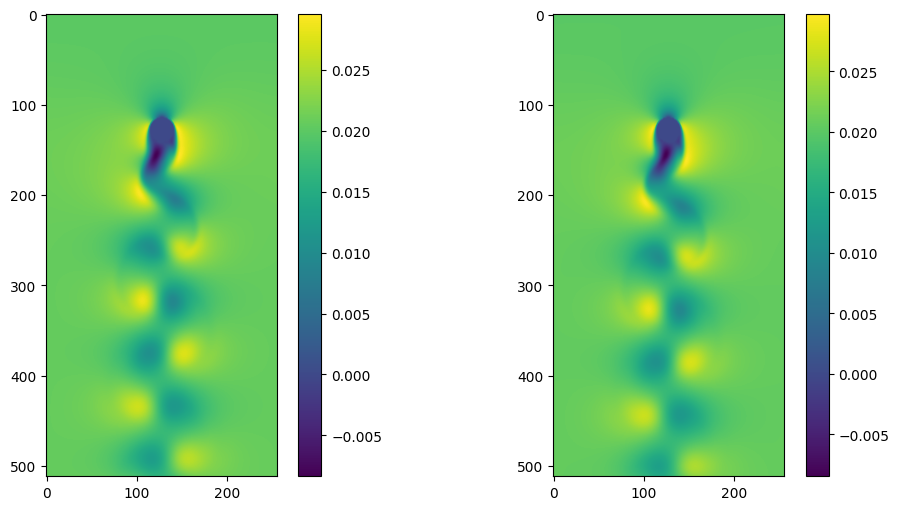

In [47]:
# plot the x velocity of the timesteps 500 and 501 in the same plot
x_velocity_t500 = velocity_array[500, 0, :, :]
x_velocity_t501 = velocity_array[501, 0, :, :]
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(x_velocity_t500.cpu().numpy(), cmap='viridis')
plt.colorbar()
plt.subplot(1, 2, 2)
plt.imshow(x_velocity_t501.cpu().numpy(), cmap='viridis')
plt.colorbar()
plt.show()



In [48]:
#checking inlet veloctiy
x_velocity_inlet = velocity_array[0, 0, :, :]
#print the unique values from the velocity array at timestep 0
unique_values = torch.unique(x_velocity_inlet)
print("Unique values: ", unique_values)
#print the grid locations where the velocity is 0
zero_indices = torch.where(x_velocity_inlet == 0)
#need it in the form of (x,y):
zero_indices = list(zip(zero_indices[0].tolist(), zero_indices[1].tolist()))
print("Indices where the velocity is 0: ", zero_indices)

Unique values:  tensor([0.0000, 0.0200])
Indices where the velocity is 0:  [(115, 125), (115, 126), (115, 127), (115, 128), (115, 129), (115, 130), (116, 122), (116, 123), (116, 124), (116, 125), (116, 126), (116, 127), (116, 128), (116, 129), (116, 130), (116, 131), (116, 132), (116, 133), (117, 121), (117, 122), (117, 123), (117, 124), (117, 125), (117, 126), (117, 127), (117, 128), (117, 129), (117, 130), (117, 131), (117, 132), (117, 133), (117, 134), (118, 119), (118, 120), (118, 121), (118, 122), (118, 123), (118, 124), (118, 125), (118, 126), (118, 127), (118, 128), (118, 129), (118, 130), (118, 131), (118, 132), (118, 133), (118, 134), (118, 135), (118, 136), (119, 118), (119, 119), (119, 120), (119, 121), (119, 122), (119, 123), (119, 124), (119, 125), (119, 126), (119, 127), (119, 128), (119, 129), (119, 130), (119, 131), (119, 132), (119, 133), (119, 134), (119, 135), (119, 136), (119, 137), (120, 118), (120, 119), (120, 120), (120, 121), (120, 122), (120, 123), (120, 124), 

In [49]:
# load another dataset
velocity_dataset = "./datasets/velocity_karman_Re_100.pt"

In [50]:
velocity_array = torch.load(velocity_dataset, weights_only=True)
velocity_array.shape

torch.Size([1001, 2, 512, 256])

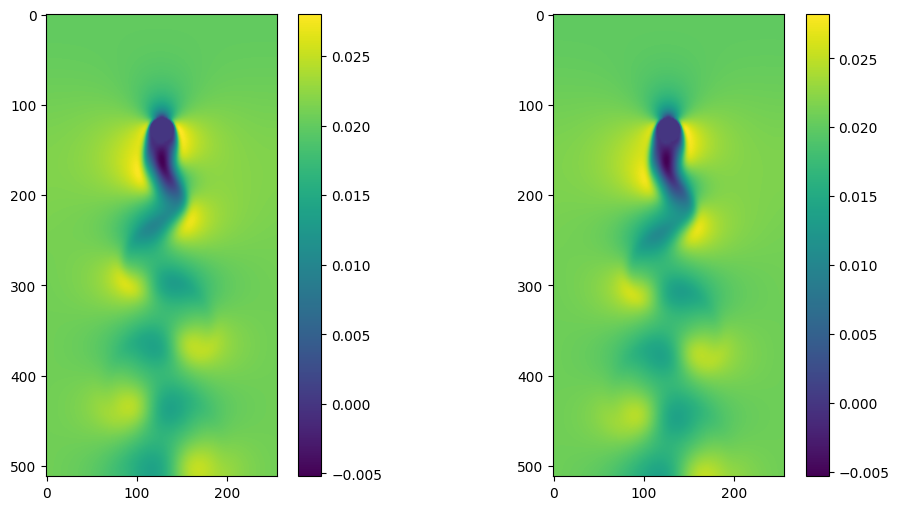

In [51]:
# plot the x velocity of the timesteps 500 and 501 in the same plot
x_velocity_t500 = velocity_array[500, 0, :, :]
x_velocity_t501 = velocity_array[501, 0, :, :]
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(x_velocity_t500.cpu().numpy(), cmap='viridis')
plt.colorbar()
plt.subplot(1, 2, 2)
plt.imshow(x_velocity_t501.cpu().numpy(), cmap='viridis')
plt.colorbar()
plt.show()



In [52]:
#checking inlet veloctiy
x_velocity_inlet = velocity_array[0, 0, :, :]
#print the unique values from the velocity array at timestep 0
unique_values = torch.unique(x_velocity_inlet)
print("Unique values: ", unique_values)
#print the grid locations where the velocity is 0
zero_indices = torch.where(x_velocity_inlet == 0)
#need it in the form of (x,y):
zero_indices = list(zip(zero_indices[0].tolist(), zero_indices[1].tolist()))
print("Indices where the velocity is 0: ", zero_indices)

Unique values:  tensor([0.0000, 0.0200])
Indices where the velocity is 0:  [(115, 125), (115, 126), (115, 127), (115, 128), (115, 129), (115, 130), (116, 122), (116, 123), (116, 124), (116, 125), (116, 126), (116, 127), (116, 128), (116, 129), (116, 130), (116, 131), (116, 132), (116, 133), (117, 121), (117, 122), (117, 123), (117, 124), (117, 125), (117, 126), (117, 127), (117, 128), (117, 129), (117, 130), (117, 131), (117, 132), (117, 133), (117, 134), (118, 119), (118, 120), (118, 121), (118, 122), (118, 123), (118, 124), (118, 125), (118, 126), (118, 127), (118, 128), (118, 129), (118, 130), (118, 131), (118, 132), (118, 133), (118, 134), (118, 135), (118, 136), (119, 118), (119, 119), (119, 120), (119, 121), (119, 122), (119, 123), (119, 124), (119, 125), (119, 126), (119, 127), (119, 128), (119, 129), (119, 130), (119, 131), (119, 132), (119, 133), (119, 134), (119, 135), (119, 136), (119, 137), (120, 118), (120, 119), (120, 120), (120, 121), (120, 122), (120, 123), (120, 124), 